### -서울시 관련 자료 형태소 분석 및 워드클라우드 

In [1]:
from konlpy.tag import Okt
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [2]:
# 데이터 불러오기

with open('data/seoul.txt', 'r', encoding='UTF-8') as f:
    raw_data = f.readlines()

In [3]:
raw_data

['\ufeff3082 박원순 시장님께 2018-03-2751\n',
 '3081 장위7구역 재개발 현금청산자 딸입니다... 2018-03-2711\n',
 '3080 미세먼지에 대하여 2018-03-2615\n',
 '3079 목동 1,2,3단지 환원 2018-03-2617\n',
 '3078 강동구 둔촌주공아파트 재건축 관련 안... 2018-03-269\n',
 '3077 성수4지구 건축심의 관련 정정 보도자... 2018-03-265\n',
 '3076 미세먼지 대안을 제안합니다 2018-03-2520\n',
 '3075 서울 개인택시 주 5일 근무제 제안과... 2018-03-251\n',
 '3074 성수전략정비구역 사업지연 사유 확인 2018-03-251\n',
 '3073 개포주공1단지아파트 이주기간이내 조기... 2018-03-247\n',
 '3072 시장님 억울함을 해소해주셔요 2018-03-2380\n',
 '3071 성수전략정비구역 4지구 건축심의 정정... 2018-03-232\n',
 '3070 수색을 관문개발하는데 철도물류기지 한... 2018-03-2326\n',
 '3069 서울시장님은 목동1.2.3단지 종환원... 2018-03-231\n',
 '3068 시.구합동보고회 2018-03-230\n',
 '3067 시장님 , 목동 주민대표와의 만남. ... 2018-03-231\n',
 '3066 목동1-3단지 종환원 문제 해결하여주... 2018-03-230\n',
 '3065 조건없는 목동123단지3종환 2018-03-230\n',
 '3064 조건없는목동123단지3종환 2018-03-230\n',
 '3063 목동 3종환원 2018-03-230\n',
 '3062 3월 30일 목동주민대표를 만나주십시... 2018-03-231\n',
 '3061 3월 30일 박원순 시장님 뵙고 싶습... 2018-03-231\n',
 '3060 목동123단지 3종환원 시구합동보고회 2018-03-231\n',
 '3059 목동123단지 3종

In [29]:
len(raw_data)

110

In [ ]:
# text 데이터만 따로 모으는 작업.

In [54]:
raw_data1 = [string.split(" ") for string in raw_data]

In [55]:
text = [string[1:len(string)-1] for string in raw_data1]

In [56]:
text_final = [" ".join(string) for string in text]

In [57]:
text_final

['박원순 시장님께',
 '장위7구역 재개발 현금청산자 딸입니다...',
 '미세먼지에 대하여',
 '목동 1,2,3단지 환원',
 '강동구 둔촌주공아파트 재건축 관련 안...',
 '성수4지구 건축심의 관련 정정 보도자...',
 '미세먼지 대안을 제안합니다',
 '서울 개인택시 주 5일 근무제 제안과...',
 '성수전략정비구역 사업지연 사유 확인',
 '개포주공1단지아파트 이주기간이내 조기...',
 '시장님 억울함을 해소해주셔요',
 '성수전략정비구역 4지구 건축심의 정정...',
 '수색을 관문개발하는데 철도물류기지 한...',
 '서울시장님은 목동1.2.3단지 종환원...',
 '시.구합동보고회',
 '시장님 , 목동 주민대표와의 만남. ...',
 '목동1-3단지 종환원 문제 해결하여주...',
 '조건없는 목동123단지3종환',
 '조건없는목동123단지3종환',
 '목동 3종환원',
 '3월 30일 목동주민대표를 만나주십시...',
 '3월 30일 박원순 시장님 뵙고 싶습...',
 '목동123단지 3종환원 시구합동보고회',
 '목동123단지 3종환원',
 '목동 123단지 종환원 촉구합니다.',
 '목동123단지 3종환원',
 '목동123단지 주민 시장님면담요청',
 '안정성이 검토되지 않은 서서울고속도로...',
 '목동1-3단지 주민은 특혜를 바라는것...',
 '빠른 시구합동보고회를 촉구합니다',
 '3종환원을위한 시구합동보고회를 3월안...',
 '조건없는 목동123단지 3종환.',
 '조건없는 목동123단지 3종환',
 '시장님 만나주세요.우리의대표분들',
 '목동123단지 입주자대표 면담요청의 ...',
 '박원순 시장은 강북 재개발을 막지 마...',
 '한강낚시',
 '서울주택도시공사의 도시개발행위를 서울...',
 '목동1~3단지 주민대표단을 만나주세요',
 '목동1~3단지 주민대표단을 만나주세요',
 '이슬람 기도실 반대입니다.',
 '박원순 시장님. 목동1-3단지 주민대...',
 '시장님! 목동 주민을 만나주십시요',
 '

In [58]:
okt = Okt()

In [59]:
pos_data = [okt.pos(word) for word in text_final]

In [60]:
pos_data_temp = sum(pos_data, [])

In [61]:
pos_data_temp[:20]

[('박원순', 'Noun'),
 ('시장님', 'Noun'),
 ('께', 'Josa'),
 ('장위', 'Noun'),
 ('7', 'Number'),
 ('구역', 'Noun'),
 ('재개발', 'Noun'),
 ('현금', 'Noun'),
 ('청산', 'Noun'),
 ('자', 'Suffix'),
 ('딸', 'Noun'),
 ('입니다', 'Adjective'),
 ('...', 'Punctuation'),
 ('미세먼지', 'Noun'),
 ('에', 'Josa'),
 ('대하', 'Noun'),
 ('여', 'Josa'),
 ('목동', 'Noun'),
 ('1', 'Number'),
 (',', 'Punctuation')]

In [62]:
pos_data_nouns = [word for word, _ in pos_data_temp if _== 'Noun']

In [63]:
pos_data_nouns

['박원순',
 '시장님',
 '장위',
 '구역',
 '재개발',
 '현금',
 '청산',
 '딸',
 '미세먼지',
 '대하',
 '목동',
 '단지',
 '환원',
 '강동구',
 '둔촌',
 '아파트',
 '재건축',
 '관련',
 '안',
 '성수',
 '지구',
 '건축',
 '심의',
 '관련',
 '정정',
 '보도',
 '미세먼지',
 '대안',
 '제안',
 '서울',
 '개인',
 '택시',
 '주',
 '무제',
 '제안',
 '성수',
 '전략',
 '정비',
 '구역',
 '사업',
 '지연',
 '사유',
 '확인',
 '개포',
 '공',
 '단지',
 '아파트',
 '기간',
 '이내',
 '조기',
 '시장님',
 '해소',
 '성수',
 '전략',
 '정비',
 '구역',
 '지구',
 '건축',
 '심의',
 '정정',
 '수색',
 '관문',
 '개발',
 '철도',
 '물류',
 '기지',
 '서울시장',
 '목동',
 '단지',
 '종',
 '환원',
 '시',
 '합동',
 '보고',
 '회',
 '시장님',
 '목동',
 '주민',
 '대표',
 '만남',
 '목동',
 '단지',
 '종',
 '환원',
 '문제',
 '해결',
 '조건',
 '목동',
 '단지',
 '종환',
 '조건',
 '목동',
 '단지',
 '종환',
 '목동',
 '종',
 '환원',
 '목동',
 '주민',
 '대표',
 '박원순',
 '시장님',
 '습',
 '목동',
 '단지',
 '종',
 '환원',
 '시구',
 '합동',
 '보고',
 '회',
 '목동',
 '단지',
 '종',
 '환원',
 '목동',
 '단지',
 '종',
 '환원',
 '촉구',
 '목동',
 '단지',
 '종',
 '환원',
 '목동',
 '단지',
 '주민',
 '시장님',
 '면담',
 '요청',
 '안정',
 '검토',
 '고속도로',
 '목동',
 '단지',
 '주민',
 '특혜',
 '합동',
 '보고',
 '회',
 '촉구',
 '종',
 '환

In [65]:
pos_data_nonus_len2 = [word for word in pos_data_nouns if len(word) >= 2]

In [66]:
pos_data_nonus_len2

['박원순',
 '시장님',
 '장위',
 '구역',
 '재개발',
 '현금',
 '청산',
 '미세먼지',
 '대하',
 '목동',
 '단지',
 '환원',
 '강동구',
 '둔촌',
 '아파트',
 '재건축',
 '관련',
 '성수',
 '지구',
 '건축',
 '심의',
 '관련',
 '정정',
 '보도',
 '미세먼지',
 '대안',
 '제안',
 '서울',
 '개인',
 '택시',
 '무제',
 '제안',
 '성수',
 '전략',
 '정비',
 '구역',
 '사업',
 '지연',
 '사유',
 '확인',
 '개포',
 '단지',
 '아파트',
 '기간',
 '이내',
 '조기',
 '시장님',
 '해소',
 '성수',
 '전략',
 '정비',
 '구역',
 '지구',
 '건축',
 '심의',
 '정정',
 '수색',
 '관문',
 '개발',
 '철도',
 '물류',
 '기지',
 '서울시장',
 '목동',
 '단지',
 '환원',
 '합동',
 '보고',
 '시장님',
 '목동',
 '주민',
 '대표',
 '만남',
 '목동',
 '단지',
 '환원',
 '문제',
 '해결',
 '조건',
 '목동',
 '단지',
 '종환',
 '조건',
 '목동',
 '단지',
 '종환',
 '목동',
 '환원',
 '목동',
 '주민',
 '대표',
 '박원순',
 '시장님',
 '목동',
 '단지',
 '환원',
 '시구',
 '합동',
 '보고',
 '목동',
 '단지',
 '환원',
 '목동',
 '단지',
 '환원',
 '촉구',
 '목동',
 '단지',
 '환원',
 '목동',
 '단지',
 '주민',
 '시장님',
 '면담',
 '요청',
 '안정',
 '검토',
 '고속도로',
 '목동',
 '단지',
 '주민',
 '특혜',
 '합동',
 '보고',
 '촉구',
 '환원',
 '합동',
 '보고',
 '조건',
 '목동',
 '단지',
 '종환',
 '조건',
 '목동',
 '단지',
 '종환',
 '시장님',
 '우리',
 '대표',
 '목동',

In [68]:
wordcloud = WordCloud(font_path = 'c:/windows/fonts/malgun.ttf',
                     width = 1600, height = 1200).generate(' '.join(pos_data_nonus_len2))

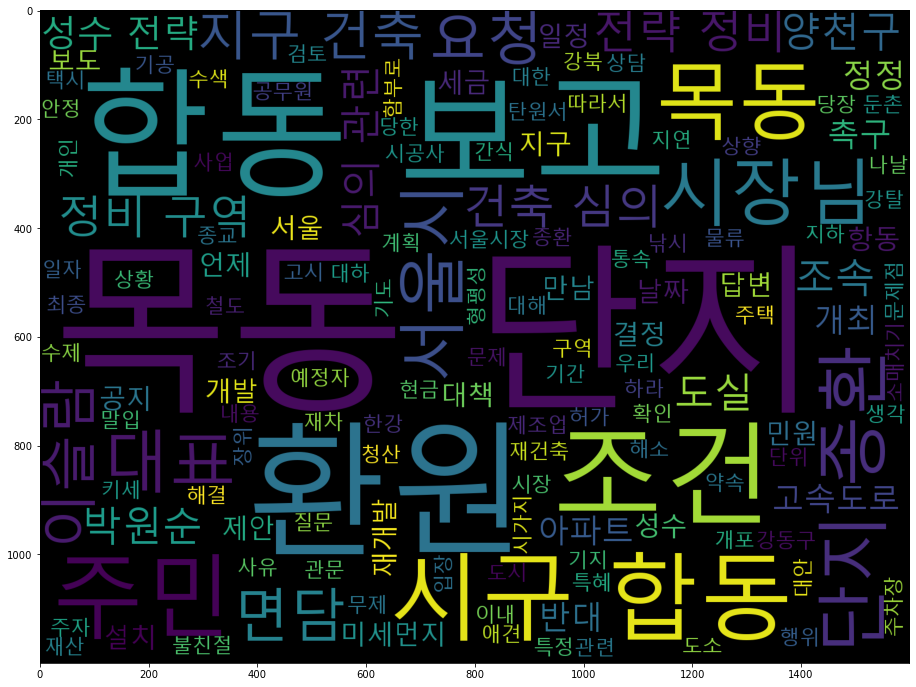

In [69]:
plt.figure(figsize = (16, 12))
plt.imshow(wordcloud)
plt.show()

In [71]:
wordcloud1 = WordCloud(font_path = 'c:/windows/fonts/malgun.ttf',
                      colormap = 'viridis', background_color='white').\
generate(' '.join(pos_data_nonus_len2))

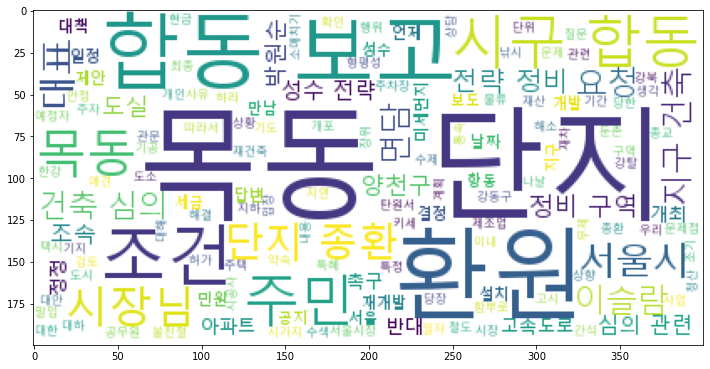

In [72]:
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud1)
plt.show()

- 자연어 처리 - collections

- collections.Counter() :

컨테이너에 동일한 값의 자료가 몇개인지를 파악하는데 사용하는 객체



In [73]:
import collections

In [75]:
count = collections.Counter(pos_data_nonus_len2)

In [79]:
count.most_common(15)

[('목동', 51),
 ('단지', 42),
 ('환원', 24),
 ('합동', 23),
 ('보고', 22),
 ('조건', 14),
 ('시구', 14),
 ('주민', 13),
 ('종환', 9),
 ('시장님', 8),
 ('지구', 7),
 ('대표', 7),
 ('서울시', 7),
 ('구역', 6),
 ('성수', 6)]

In [80]:
import matplotlib.font_manager as fm

font_path = 'C:\\WINDOWS\\Fonts\\gulim.ttc'
font_name = fm.FontProperties(fname = font_path).get_name()
plt.rcParams['font.family'] = font_name

In [81]:
words = []
freqs = []
for word, freq in count.most_common(20):
    words.append(word)
    freqs.append(freq)

In [82]:
freqs

[51, 42, 24, 23, 22, 14, 14, 13, 9, 8, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5]

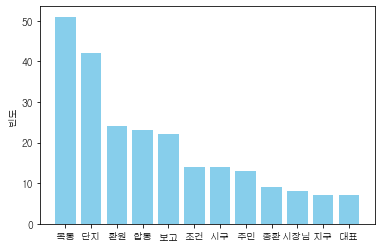

In [83]:
plt.bar(x = words[:12], height = freqs[:12], color = 'skyblue')
plt.ylabel('빈도')
plt.show()

In [84]:
outwords = ['주민', '종환', '시장님', '대표', '박원순']

In [86]:
text_token_all3 = [word for word in pos_data_nonus_len2 if word not in outwords]

In [88]:
count1 = collections.Counter(pos_data_nonus_len2)

In [89]:
words1 = []
freqs1 = []
for word, freq in count1.most_common(20):
    words1.append(word)
    freqs1.append(freq)

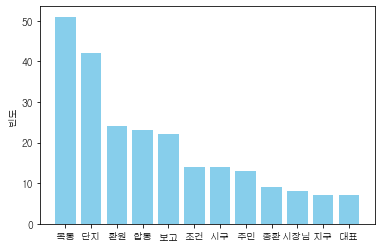

In [91]:
plt.bar(x=words1[:12], height = freqs1[:12], color = 'skyblue')
plt.ylabel('빈도')
plt.show()